In [3]:
import yaml
import os
import datetime
# from datetime import date,datetime,timedelta
import numpy
import csv
from tabulate import tabulate
from matplotlib import pyplot as plt 

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
filesNums=[]
for f in os.listdir('tests'):
    if f[-5:]=='.yaml':
        filesNums.append(int(f[:-5]))
filesNums.sort(reverse=True)
files=[]
for f in filesNums:
    files.append('tests/'+str(f)+'.yaml')

In [ ]:
dateToday=datetime.datetime.now()
date5yrBack=dateToday+datetime.timedelta(days=-(365*5))
date3yrBack=dateToday+datetime.timedelta(days=-(365*3))
date2yrBack=dateToday+datetime.timedelta(days=-(365*2))
date1yrBack=dateToday+datetime.timedelta(days=-(365*1))

In [4]:
bowlers,testCount={},0
for f in files:
    with open(f, 'r') as stream:
        thisData=yaml.safe_load(stream)
        startDate=thisData['info']['dates'][0]
                
        if isinstance(thisData['info']['dates'][0],datetime.date):
            if date3yrBack>datetime.datetime.combine(thisData['info']['dates'][0],  datetime.datetime.min.time()):
                continue
        else:
            if date3yrBack>datetime.datetime.strptime(startDate,'%Y-%m-%d'):
                continue
        if isinstance(thisData['info']['dates'][0],datetime.date):
            if date5yrBack>datetime.datetime.combine(thisData['info']['dates'][0],  datetime.datetime.min.time()):
                break
        else:
            if date5yrBack>datetime.datetime.strptime(startDate,'%Y-%m-%d'):
                break
                
                
                
        if thisData['info']['gender']!='male':
            continue
        
        testCount+=1
        print(testCount,startDate,thisData['info']['teams'])
        
        thisMatchBowlers={}
        for i in range(len(thisData['innings'])):
            if i==0:k1='1st innings'
            if i==1:k1='2nd innings'
            if i==2:k1='3rd innings'
            if i==3:k1='4th innings'

            batsmen,wicketCount,NewBatsman,checkTailender,tailenders,thisInningsBowlers=[],0,True,False,{},{}
            for d in range(len(thisData['innings'][i][k1]['deliveries'])):
                thisBall=list(thisData['innings'][i][k1]['deliveries'][d].keys())[0]
                thisBallData=thisData['innings'][i][k1]['deliveries'][d][thisBall]

                batsman=thisBallData['batsman']
                non_striker=thisBallData['non_striker']
                bowler=thisBallData['bowler']
                runs=thisBallData['runs']
                wicketFall=False if thisBallData.get('wicket') is None else True
                extraRun=False if thisBallData.get('extras') is None else True

                if NewBatsman:
                    if batsman not in batsmen:
                        batsmen.append(batsman)
                        if len(batsmen)>=7:
                            tailenders[batsman]=1 #dummyVariable
                    if non_striker not in batsmen:
                        batsmen.append(non_striker)
                        if len(batsmen)>=7:
                            tailenders[non_striker]=1 #dummyVariable
                    NewBatsman=False
                    if len(batsmen)>=7:
                        checkTailender=True

                if checkTailender:
                    if tailenders.get(batsman) is not None:
                        if bowlers.get(bowler) is None:
                            bowlers[bowler]={}
                            bowlers[bowler]['balls']=0
                            bowlers[bowler]['runs']=0
                            bowlers[bowler]['wickets']=0
                            bowlers[bowler]['matches']=0
                            bowlers[bowler]['innings']=0
                        if thisMatchBowlers.get(bowler) is None:
                            bowlers[bowler]['matches']+=1
                            thisMatchBowlers[bowler]=1 #dummyVariable
                        if thisInningsBowlers.get(bowler) is None:
                            bowlers[bowler]['innings']+=1
                            thisInningsBowlers[bowler]=1 #dummyVariable
                            
                        bowlers[bowler]['balls']+=1
                        bowlers[bowler]['runs']+=runs['batsman']
                        if extraRun:
                            if thisBallData['extras'].get('noballs'):
                                bowlers[bowler]['runs']+=1
                            if thisBallData['extras'].get('wides'):
                                bowlers[bowler]['runs']+=thisBallData['extras']['wides']
                        if wicketFall:
                            if thisBallData['wicket']['kind']=='stumped'\
                                or thisBallData['wicket']['kind']=='caught and bowled'\
                                or thisBallData['wicket']['kind']=='caught'\
                                or thisBallData['wicket']['kind']=='bowled'\
                                or thisBallData['wicket']['kind']=='lbw'\
                                :bowlers[bowler]['wickets']+=1

                if wicketFall:
                    wicketCount+=1
                    if wicketCount<10:
                        NewBatsman=True
                        

1 2021-02-11 ['West Indies', 'Bangladesh']
2 2021-02-03 ['Bangladesh', 'West Indies']
3 2021-02-13 ['India', 'England']
4 2021-02-05 ['England', 'India']
5 2021-02-04 ['Pakistan', 'South Africa']
6 2021-01-26 ['South Africa', 'Pakistan']
7 2021-01-22 ['Sri Lanka', 'England']
8 2021-01-14 ['Sri Lanka', 'England']
9 2021-01-03 ['Sri Lanka', 'South Africa']
10 2020-12-26 ['Sri Lanka', 'South Africa']
11 2021-01-03 ['Pakistan', 'New Zealand']
12 2020-12-26 ['New Zealand', 'Pakistan']
13 2020-12-11 ['New Zealand', 'West Indies']
14 2020-12-03 ['New Zealand', 'West Indies']
15 2020-07-24 ['England', 'West Indies']
16 2020-07-16 ['England', 'West Indies']
17 2020-07-08 ['England', 'West Indies']
18 2021-01-15 ['Australia', 'India']
19 2021-01-07 ['Australia', 'India']
20 2020-12-26 ['Australia', 'India']
21 2020-12-17 ['India', 'Australia']
22 2020-02-22 ['Bangladesh', 'Zimbabwe']
23 2020-02-07 ['Pakistan', 'Bangladesh']
24 2020-01-27 ['Zimbabwe', 'Sri Lanka']
25 2020-01-19 ['Zimbabwe', 'Sri 

KeyboardInterrupt: 

In [5]:
for b in list(bowlers.keys()):
    bowlers[b]['SR']=bowlers[b]['balls']/bowlers[b]['wickets'] if bowlers[b]['wickets']>0 else 0
    bowlers[b]['avg']=bowlers[b]['runs']/bowlers[b]['wickets'] if bowlers[b]['wickets']>0 else 0

data=[]
headers,getHeaders=['Name'],True
for b in list(bowlers.keys()):
    if getHeaders:
        for h in list(bowlers[b].keys()):
            headers.append(h)
        getHeaders=False
        
    thisBowlerData=[b]
    for h in range(1,len(headers)):
        thisBowlerData.append(bowlers[b][headers[h]])
    data.append(thisBowlerData)

In [73]:
SR,AVG,WICKET,names,filteredData=[],[],[],[],[]
for d in data:
    if d[1]>100:
        if d[-1]!=numpy.Inf: AVG.append(d[-1])
        else: AVG.append(0)
        if d[-2]!=numpy.Inf: SR.append(d[-2])
        else: SR.append(0)
        WICKET.append(d[3])
        names.append(d[0])
        filteredData.append([d[0],d[1],d[2],d[3],d[4],d[5],SR[-1],AVG[-1]])
    
AVGstd,AVGmean,AVGmax,AVGmin=numpy.std(AVG),numpy.mean(AVG),max(AVG),min(AVG)
SRstd,SRmean,SRmax,SRmin=numpy.std(SR),numpy.mean(SR),max(SR),min(SR)
WICKETstd,WICKETmean,WICKETmax,WICKETmin=numpy.std(WICKET),numpy.mean(WICKET),max(WICKET),min(WICKET)

SRscaled,AVGscaled,WICKETscaled=[],[],[]
for i in range(len(AVG)):
    SRscaled.append((SRmax-SR[i])/(SRmax-SRmin))
    AVGscaled.append((AVGmax-AVG[i])/(AVGmax-AVGmin))
    WICKETscaled.append((WICKET[i]-WICKETmin)/(WICKETmax-WICKETmin))
    
Ratings=[]
for i in range(len(AVG)):
    indexVal=(1/3)*WICKETscaled[i]+(1/3)*SRscaled[i]+(1/3)*AVGscaled[i]
    Ratings.append([names[i],indexVal])
    bowlers[names[i]]['indexVal2']=indexVal
    print(names[i],indexVal)
    
#     Ratings.append([names[i],(1/3)*WICKETscaled[i]+(1/3)*SRscaled[i]+(1/3)*AVGscaled[i]])
# RatingsSorted=sorted(Ratings, key = lambda x: x[1],reverse=True)

# top30={}
# top30['names']=[]
# top30List=[]
# for r in RatingsSorted:
#     top30['names'].append(r[0])
#     top30List.append([r[0],bowlers[r[0]]['balls'],bowlers[r[0]]['runs'],bowlers[r[0]]['wickets'],bowlers[r[0]]['SR'],bowlers[r[0]]['avg'],bowlers[r[0]]['indexVal']])
# print(tabulate(top30List,headers=['name','deliveries','runs','wickets','SR','AVG','indexVal']))

Mehedi Hasan Miraz 0.7146625234860529
Taijul Islam 0.7078015955724933
Abu Jayed 0.5272066022840016
Nayeem Hasan 0.5373112875047859
RRS Cornwall 0.5077359233705983
AS Joseph 0.5423517784198899
ST Gabriel 0.6374127434498951
JA Warrican 0.5259779199407681
KC Brathwaite 0.5384254645864552
KAJ Roach 0.6513415743519549
MM Ali 0.737496155839809
MJ Leach 0.6096256986349865
JE Root 0.2582238162733519
R Ashwin 0.7284962318653814
Kuldeep Yadav 0.4710023843150778
Mohammed Siraj 0.40246304565190016
I Sharma 0.7029872230801023
SCJ Broad 0.8787875618370973
S Nadeem 0.42785376144509274
Washington Sundar 0.06846327047565437
JJ Bumrah 0.7248278628567586
DM Bess 0.5267677612878852
BA Stokes 0.6887491639813621
JC Archer 0.6069708094669395
JM Anderson 0.742757128179355
A Nortje 0.591443681226963
K Rabada 0.8663530989178698
KA Maharaj 0.7013208677295364
PWA Mulder 0.4717041133449802
GF Linde 0.5663115550112454
Shaheen Shah Afridi 0.560416524038815
Hasan Ali 0.6543430656240254
Faheem Ashraf 0.500782868429927

In [76]:
top30List2=[]
for r in RatingsSorted:
    top30['names'].append(r[0])
    top30List2.append([r[0],bowlers[r[0]]['balls'],bowlers[r[0]]['runs'],bowlers[r[0]]['wickets'],bowlers[r[0]]['SR'],bowlers[r[0]]['avg'],bowlers[r[0]]['indexVal2']])
print(tabulate(top30List2,headers=['name','deliveries','runs','wickets','SR','AVG','indexVal2']))



name                   deliveries    runs    wickets        SR       AVG    indexVal2
-------------------  ------------  ------  ---------  --------  --------  -----------
SCJ Broad                    1268     603         44   28.8182  13.7045     0.878788
K Rabada                      718     415         38   18.8947  10.9211     0.866353
TG Southee                    993     497         39   25.4615  12.7436     0.852165
PJ Cummins                   1113     578         37   30.0811  15.6216     0.814515
N Wagner                      893     390         33   27.0606  11.8182     0.807579
NM Lyon                      1970     976         44   44.7727  22.1818     0.807672
MA Starc                     1132     623         36   31.4444  17.3056     0.79654
Yasir Shah                   1005     487         30   33.5     16.2333     0.751673
JM Anderson                   992     470         29   34.2069  16.2069     0.742757
UT Yadav                      362     192         20   18.1     

In [64]:
top30['WICKETscaled']=[]
top30['SRscaled']=[]
top30['AVGscaled']=[]
for i in range(30):
    ind=names.index(top30['names'][i])
    top30['WICKETscaled'].append(WICKETscaled[ind])
    top30['SRscaled'].append(SRscaled[ind])
    top30['AVGscaled'].append(AVGscaled[ind])

In [29]:
top30['names']=top30['names'][:30]
len(top30['names'])

30

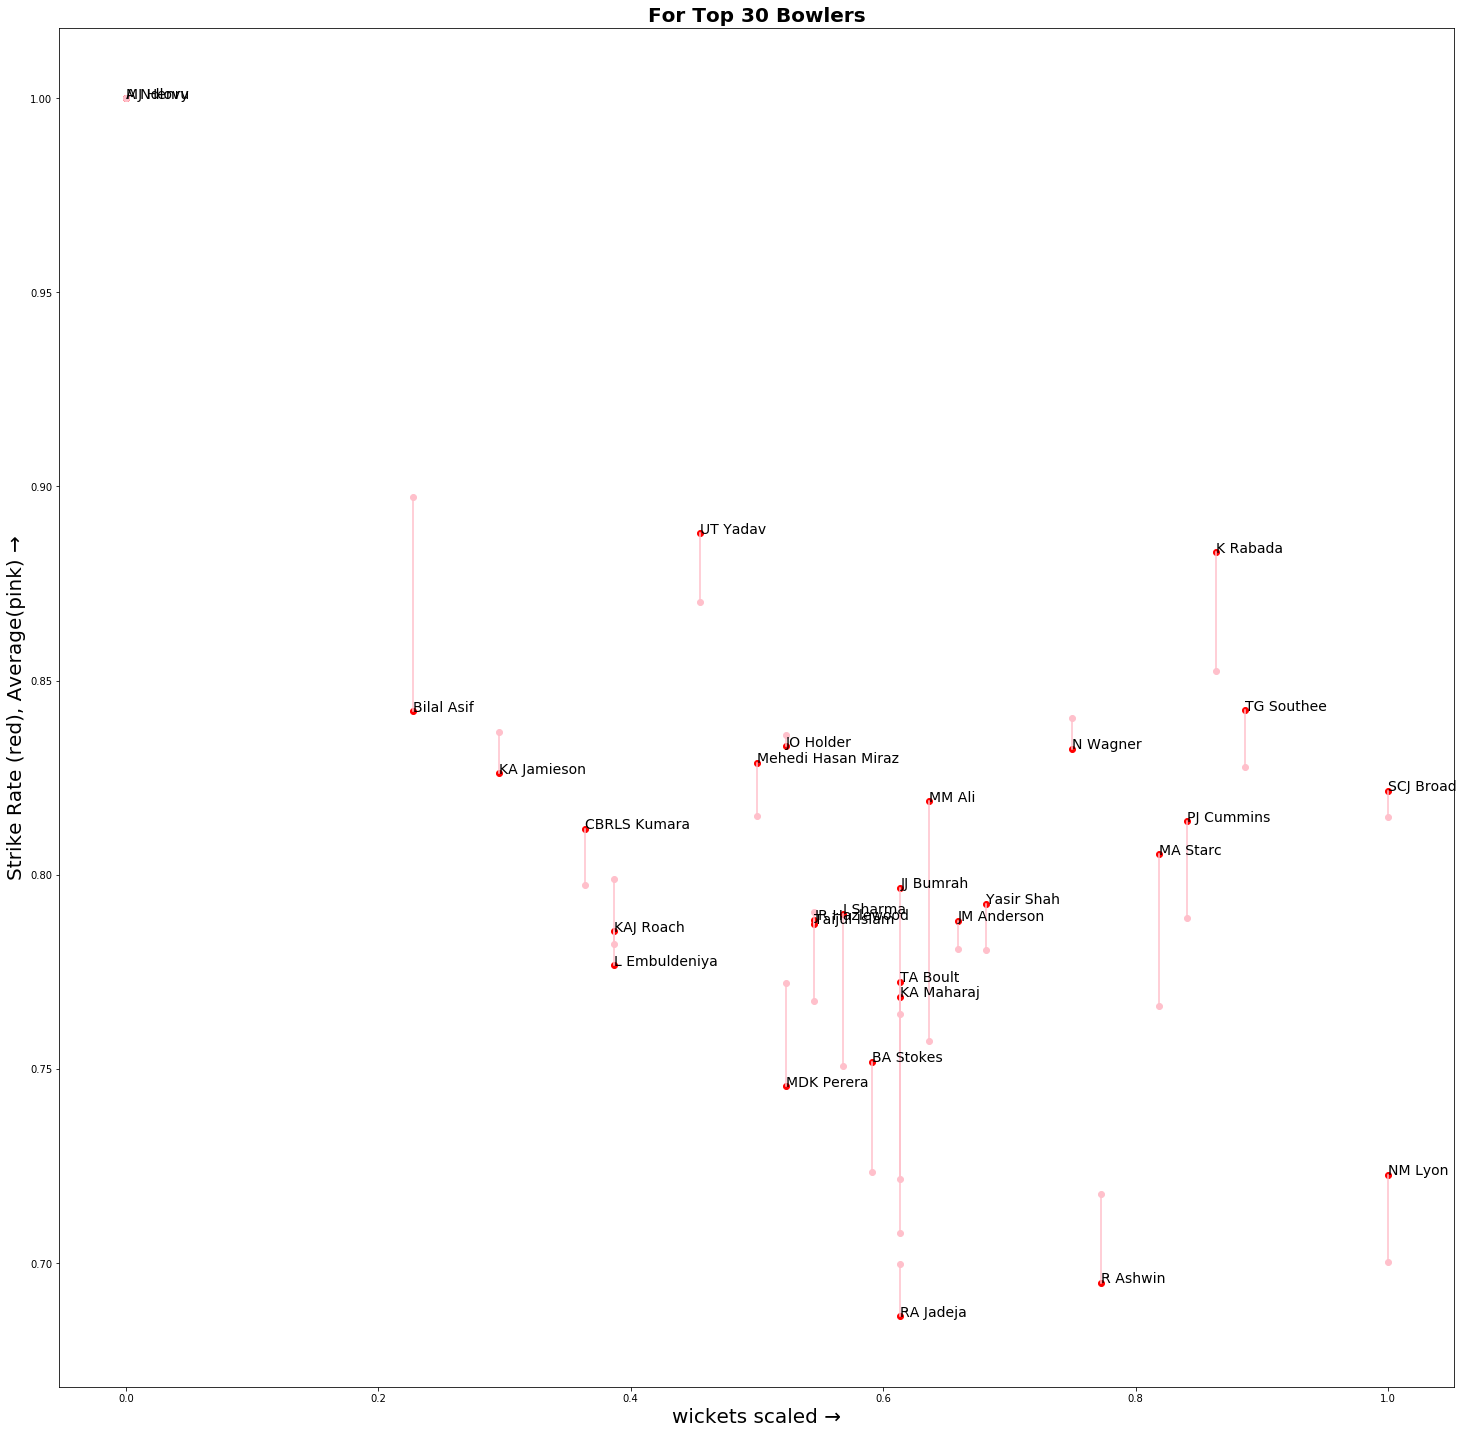

In [65]:
fig=plt.figure(figsize=(25,25))
# fig, ax = plt.subplots()



plt.scatter(top30['WICKETscaled'],top30['SRscaled'],color='red')
plt.scatter(top30['WICKETscaled'],top30['AVGscaled'],color='pink')
plt.xlabel('wickets scaled \u2192',fontsize=20)
plt.ylabel('Strike Rate (red), Average(pink) \u2192',fontsize=20)
plt.title('For Top 30 Bowlers',fontsize=20,weight='bold')

for i, txt in enumerate(top30['names']):
    plt.annotate(txt, (top30['WICKETscaled'][i],top30['SRscaled'][i]),fontsize=14)
#     plt.annotate(txt, (top30['WICKETscaled'][i],top30['AVGscaled'][i]))

    plt.plot([top30['WICKETscaled'][i],top30['WICKETscaled'][i]],[top30['AVGscaled'][i],top30['SRscaled'][i]],color='pink')
    
plt.show()
fig.savefig('2.png', bbox_inches = 'tight',pad_inches = 0)

In [92]:
print(SRstd/SRmean,AVGstd/AVGmean)

0.5419777948527685 0.5463721560092437


In [94]:
sortedOnWicket=sorted(filteredData, key = lambda x: x[3],reverse=True)
sortedOnSR=sorted(filteredData, key = lambda x: x[-2])
sortedOnAVG=sorted(filteredData, key = lambda x: x[-1])

rankDict={}
for n in names:
    rankDict[n]={}
    
for d in range(len(sortedOnWicket)):
    rankDict[sortedOnWicket[d][0]]['WICKET']=d
for d in range(len(sortedOnSR)):
    rankDict[sortedOnSR[d][0]]['SR']=d
for d in range(len(sortedOnAVG)):
    rankDict[sortedOnAVG[d][0]]['AVG']=d
    
for r in list(rankDict.keys()):
    rankDict[r]['diSR']=((1/3)*rankDict[r]['WICKET']-(1/3)*rankDict[r]['SR'])*((1/3)*rankDict[r]['WICKET']-(1/3)*rankDict[r]['SR'])
    rankDict[r]['diAVG']=((1/3)*rankDict[r]['WICKET']-(1/3)*rankDict[r]['AVG'])*((1/3)*rankDict[r]['WICKET']-(1/3)*rankDict[r]['AVG'])
#     print(r,rankDict[r])
sumAVG,sumSR=0,0
for r in list(rankDict.keys()):
    sumAVG+=rankDict[r]['diAVG']
    sumSR+=rankDict[r]['diSR']
    
N=len(sortedOnWicket)*(len(sortedOnWicket)*len(sortedOnWicket)-1)
print(1-(6*sumAVG)/N,1-(6*sumSR)/N)

0.9350103886186361 0.9405642086054458


In [70]:
X=[]
for d in filteredData:
    X.append(d[-2])
print(numpy.median(X))

38.487980769230774
